# Notas originales: [12 steps to N-S](https://www.theoj.org/jose-papers/jose.00021/10.21105.jose.00021.pdf)

#Ecuación de Burger
----------------------
La ecuación de Burger en una dimensión es
\begin{equation}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^{2} u}{\partial x^2},
\end{equation}
es una combinación de una convección no lineal y una difusion.
Al igual que en los casos anteriores discretizamos la ecuación. Mediante diferenciación hacia delante para la parte temporal, diferenciación hacia atras para la derivada espacial y mediante las expansiones en serie de Taylor para la segunda derivada, la ecuación discretizada es
\begin{equation}
\frac{u_i^{n+1}-u_i^n}{\Delta t} + u^{n}_{i} \frac{u_i^n - u_{i-1}^n}{\Delta x} = \nu \frac{u^{n}_{i+1}-2u^{n}_{i} + u^{n}_{i-1}}{\Delta x^2},
\end{equation}
dada una condición inicial, la unica variable desconocida es $u_i^{n+1}$, despejando para esta variale, obtenemos la ecuación con la cual podemos avanzar en el tiempo
\begin{equation}
u^{n+1}_{i} = u^{n}_{i} - u^{n}_{i} \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n) + \frac{\nu \Delta t}{\Delta x^{2}} (u^{n}_{i+1}-2u^{n}_{i} + u^{n}_{i-1}).
\end{equation}


#Ejemplo
--------------------------
A continuacion se realiza un ejemplo para las condiciones iniciales
\begin{equation}
u = -\frac{2\nu}{\phi} \frac{\partial \phi}{\partial x} + 4,
\end{equation}
\begin{equation}
\phi = \exp \left( \frac{-x^2}{4\nu} \right) + \exp \left( \frac{-(x - 2 \pi)^2}{4\nu} \right),
\end{equation}
cuya solucion es
\begin{equation}
u = -\frac{2\nu}{\phi} \frac{\partial \phi}{\partial x} + 4,
\end{equation}
\begin{equation}
\phi = \exp \left( \frac{-(x-4t)^2}{4\nu (t+1)} \right) + \exp \left( \frac{-(x - 4t - 2 \pi)^2}{4\nu (t+1)} \right),
\end{equation}
y la condición de frontera
\begin{equation}
u(0) = u(2\pi)
\end{equation}

(0, 10)

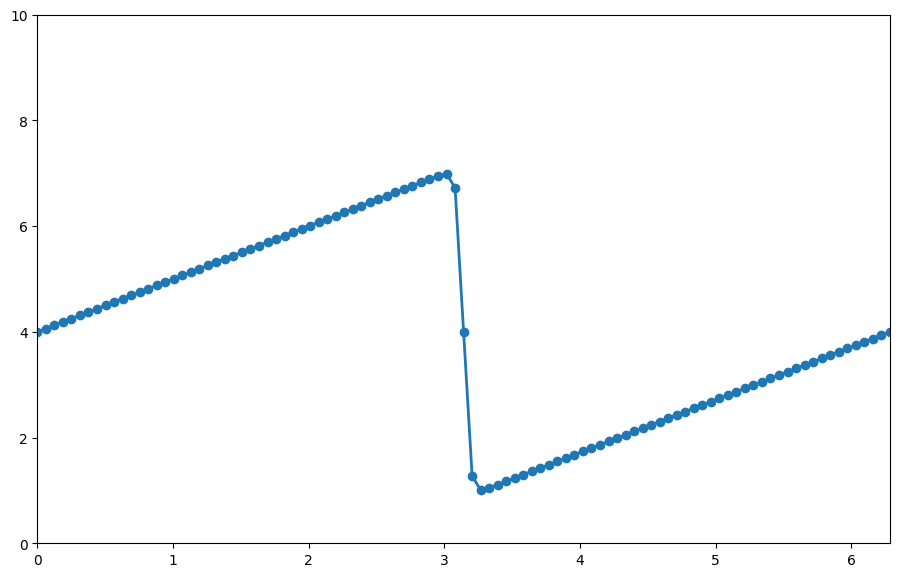

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def u_analitica(nu, t, x):
    return -2*nu*(-(-8*t + 2*x)*np.exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*np.pi)*np.exp(-(-4*t + x - 2*np.pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(np.exp(-(-4*t + x - 2*np.pi)**2/(4*nu*(t + 1))) + np.exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4

###variables útiles
nx = 101
nt = 100
dx = 2 * np.pi / (nx - 1)
nu = .07
dt = dx * nu

x = np.linspace(0, 2 * np.pi, nx) #intervalo 0  a 2*pi
un = np.linspace(0, 0, nx)
u = np.linspace(0, 0, nx)

#condicion inicial
for i in range(len(x)):
    u[i] = u_analitica(nu, 0, x[i])

plt.figure(figsize=(11, 7), dpi=100)    
plt.plot(x,u, marker = 'o', lw = 2)
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10])

(0, 10)

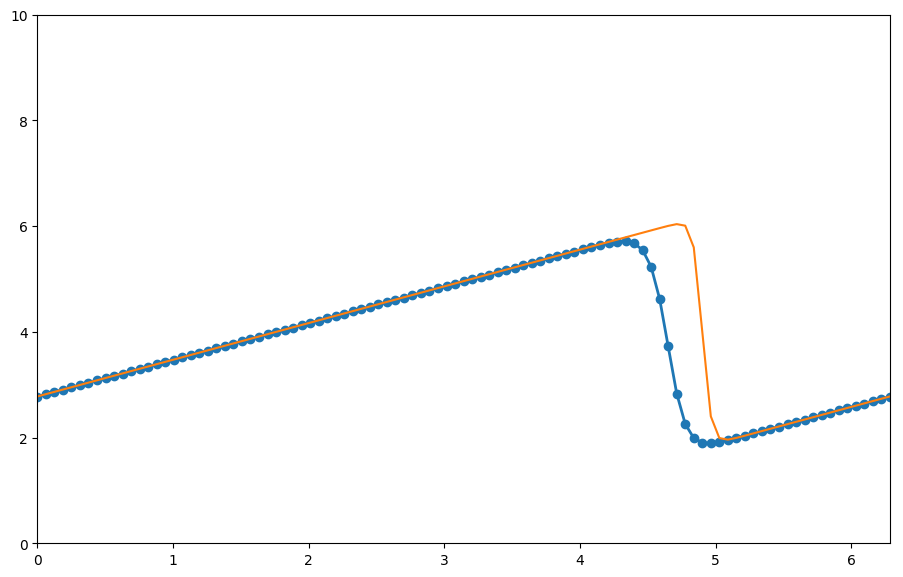

In [0]:
for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 *\
                (un[i+1] - 2 * un[i] + un[i-1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 *\
                (un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0] #condicion de frontera

# solucion analitica 
U = np.linspace(0, 0, nx)
for i in range(len(x)):
    U[i] = u_analitica(nu, nt*dt, x[i])

plt.figure(figsize=(11, 7), dpi=100)    
plt.plot(x,u, marker = 'o', lw = 2)
plt.plot(x,U)
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10])